In [4]:
#Daily Challenge: Import and Clean Data

import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_excel("Superstore.xls")

# Take a quick look
df.head()

Saving Superstore.xls to Superstore.xls


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:
print("Shape:", df.shape)        # Rows & columns
print("Columns:", df.columns)    # Column names

df = df.drop_duplicates()


# Check for missing values in a DataFrame
missing_data = df.isnull()
print(missing_data.head())


# check datatypes
print(df.dtypes)


Shape: (9994, 21)
Columns: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')
   Row ID  Order ID  Order Date  Ship Date  Ship Mode  Customer ID  \
0   False     False       False      False      False        False   
1   False     False       False      False      False        False   
2   False     False       False      False      False        False   
3   False     False       False      False      False        False   
4   False     False       False      False      False        False   

   Customer Name  Segment  Country   City  ...  Postal Code  Region  \
0          False    False    False  False  ...        False   False   
1          False    False    False  False  ...        False   False   
2          False    False    

In [11]:
#clean up data

df['Year'] = df['Order Date'].dt.year

categories = [
    'Country', 'Product Name', 'State'
]

for col in categories:
    df[col] = df[col].astype('category')

# Check result
print(df.dtypes)

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                category
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name           category
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
Year                      int32
dtype: object


In [20]:
#Data Visualization: Create an interactive line chart showing sales trends over the years

import plotly.express as px
import pandas as pd

#get sales trends over the years

yearly_sales = df.groupby('Year', as_index=False)['Sales'].sum()

# Creating a line chart
fig = px.line(yearly_sales, x='Year', y='Sales',title="Annual Sales Trends: 2014 - 2017 ", markers=True)

fig.update_layout(title='Annual Sales Trends',
                  xaxis_title='Year',
                  yaxis_title='Annual Sales (in USD)',
                  xaxis_type='category',
                  template='plotly_dark') #some issues with plotly seeing it as 'none'
fig.show()

#Insights:

##While sales dipped from 2014 - 2015, from 2015 onwards, sales increased exponentially indicating a continuously upward trend.

### I liked the Plotly visualization. Much easier and more useful to interpret and will be good for dashboards.



In [28]:
#Build an interactive map to visualize sales distribution by country.


#get sales by country
country_sales = df.groupby('Country', as_index=False)['Sales'].sum()

# Creating a line chart
fig = px.line(country_sales, x='Country', y='Sales',title="Sales Trends by Country", markers=True) #there's only the U.S.A. so we're going to change it and show by State

state_sales = df.groupby('State', as_index=False)['Sales'].sum()

new_fig = px.line(state_sales, x='State', y='Sales',title="Sales Trends by State", markers=True)


new_fig.update_layout(title='Which U.S. States are Buying?',
                  xaxis_title='U.S. State',
                  yaxis_title='Total Sales (in USD)',
                  xaxis_type='category',
                  template='plotly_dark') #some issues with plotly seeing it as 'none'

new_fig.show()

/tmp/ipython-input-2090135636.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



#Insights:

##As there was only one country (United States), I modified the assignment to group by U.S. states. As you can see from the chart, Colorado, followed by New York had the highest number of sales. I wonder if its because the company happens to be based in one or the other. I liked this visualization as well, but I would note that it was not as interactive as it could be. This is because of the way the assignment was written.

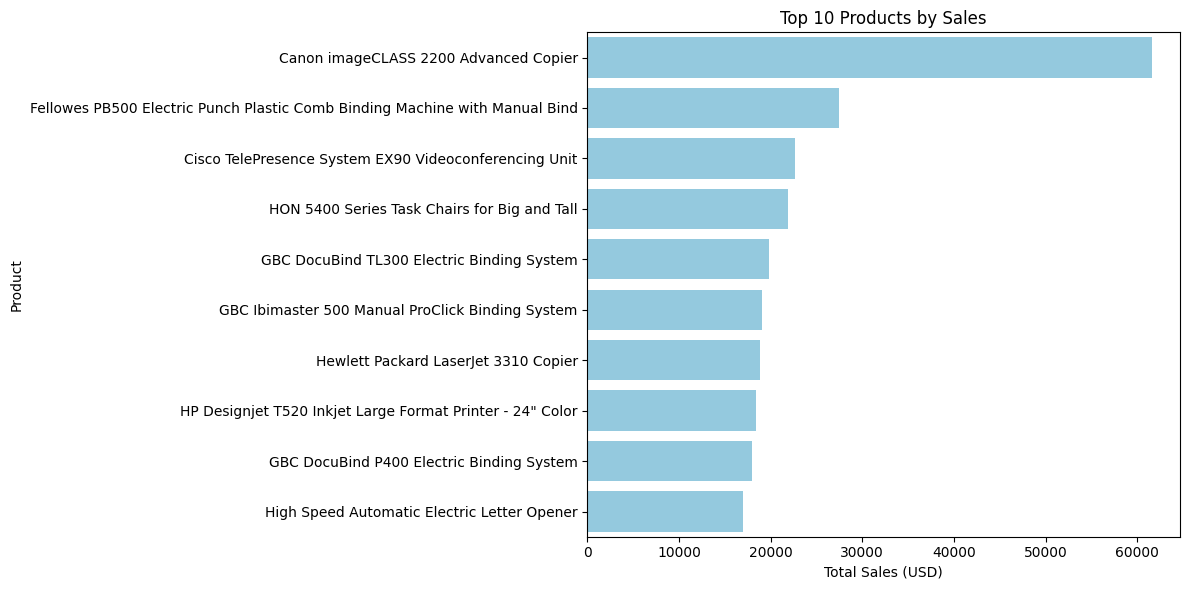

In [57]:
# Data Visualization with Seaborn - generate a bar chart showing top 10 products by sales.

import seaborn as sns
import matplotlib.pyplot as plt

plt.close('all')

# 1) Make sure columns are clean (strings + numeric)
df['Product Name'] = df['Product Name'].astype(str).str.strip()
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')


# Aggregate sales by product
top = (df.groupby('Product Name', as_index=False)['Sales'].sum().nlargest(10, 'Sales').sort_values('Sales', ascending=True))


plt.figure(figsize=(12,6))
sns.barplot(
    data=top,
    x='Sales',
    y='Product Name',
    color="skyblue"
)

ax = sns.barplot(data=top, x='Sales', y='Product Name', color='skyblue')
ax.invert_yaxis()

plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()



In [ ]:
#Insights:

##The most popular products sold (in order), were office - related products. If i were the company, I would exand on this area. I would also add an overlay to see how many units were sold to determine if its one item that sold or multiple before making additional investments.

### I understand they want a Seaborn visualization but frankly, I found this so boring.

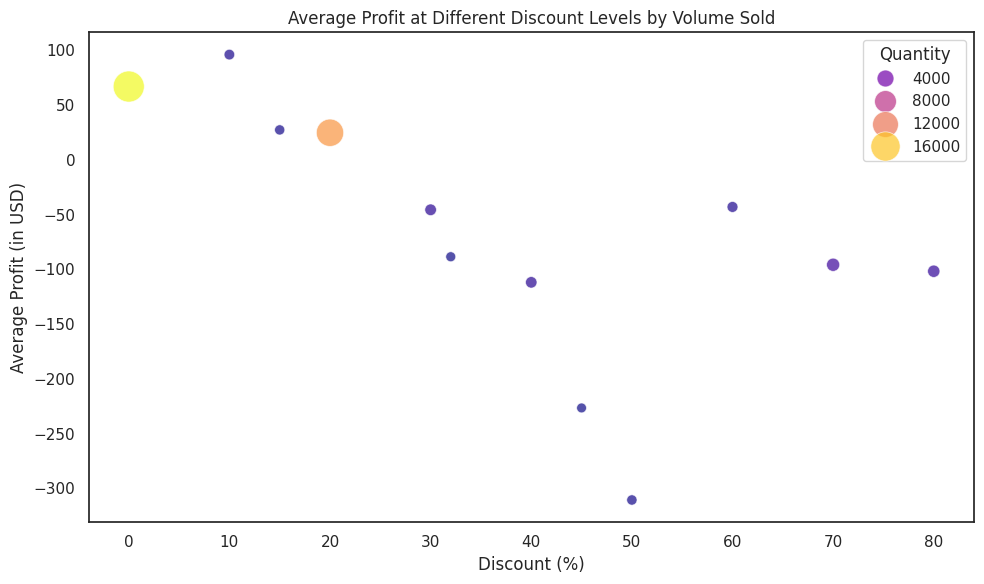

In [76]:
#Create a scatter plot to analyze the relationship between profit and discount.

df['percentage'] = df['Discount'] * 100
avgprofit = df.groupby('percentage', as_index=False)['Profit'].mean()
bubble = df.groupby('percentage', as_index=False).agg({'Profit':'mean', 'Quantity':'sum'})

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=bubble,
    x="percentage",
    y="Profit",
    size="Quantity",
    sizes=(50, 500),
    hue = "Quantity",
    palette="plasma",
    alpha=0.7,
    legend="brief"
)

plt.title("Average Profit at Different Discount Levels by Volume Sold")
plt.xlabel("Discount (%)")
plt.ylabel("Average Profit (in USD)")
plt.tight_layout()
plt.show()




#Insights:

##I played around with this chart to see what types of findings I can learn from the size of the discount vs. how much profit the company made. I don't think the Seaborn visualization was good here because it's not interactive and I'd like to know what categories or compare and contrast. Interestingly, we can see that the size of teh discount seems to have had an impact on sales losses. So the greater the discount, the more likely the company was not to make a profit. Interestingly enough, teh company's sales volume was fairly high even with a 20% discount suggesting. sweet spot.